## Image Classification of Cloud, Sunrise, Shine and Rain Weather Images.

In [ ]:
# prompt: perform  image - gray scale , rgb
# for above dataset

import cv2
import os
import matplotlib.pyplot as plt

# Define the path to the extracted dataset
dataset_path = "/content/Weather-Analysis-main"

# Function to convert image to grayscale and RGB
def process_image(image_path):
    try:
        img = cv2.imread(image_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return gray_img, rgb_img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None, None

# Iterate through the image files
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')): # Add more extensions if needed
            image_path = os.path.join(root, file)
            gray, rgb = process_image(image_path)

            if gray is not None and rgb is not None:
                # Display or save the images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(gray, cmap='gray')
                plt.title("Grayscale")
                plt.subplot(1, 2, 2)
                plt.imshow(rgb)
                plt.title("RGB")
                plt.show()

                # Example to save the images (optional)
                # cv2.imwrite(os.path.join(root, f"{file}_gray.jpg"), gray)
                # cv2.imwrite(os.path.join(root, f"{file}_rgb.jpg"), rgb)



Found 900 images belonging to 4 classes.
Found 223 images belonging to 4 classes.
Class Indices: {'cloud': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 587ms/step - accuracy: 0.6637 - loss: 1.1266 - val_accuracy: 0.4798 - val_loss: 3.8068
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.8230 - loss: 0.6709 - val_accuracy: 0.3004 - val_loss: 3.4567
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.8263 - loss: 0.4301 - val_accuracy: 0.3677 - val_loss: 5.9886
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.8322 - loss: 0.5398 - val_accuracy: 0.2691 - val_loss: 4.7832
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.8672 - loss: 0.4162 - val_accuracy: 0.2691 - val_loss: 5.5796
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.8981 - loss: 0.3310 - val_accuracy: 0.2691 - val_loss: 6.6176
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.8352 - loss: 0.4946 - val_accuracy: 0.2735 - val_loss: 4.1230
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.9058 - loss: 0.2530 - val_accuracy: 0

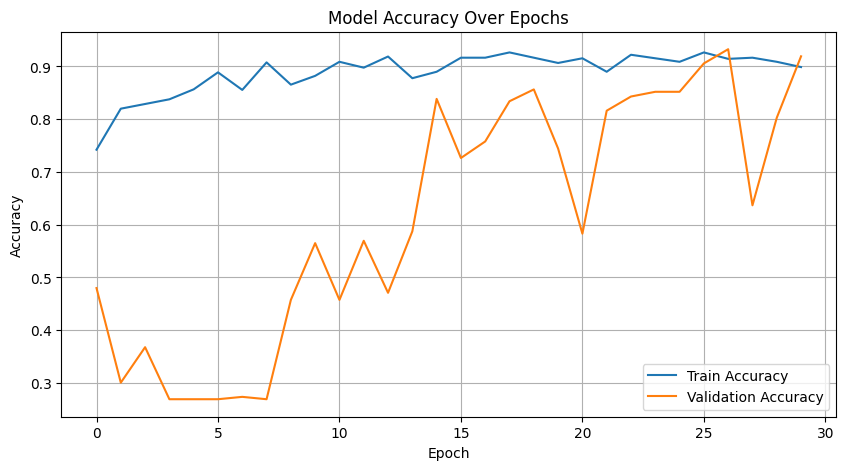

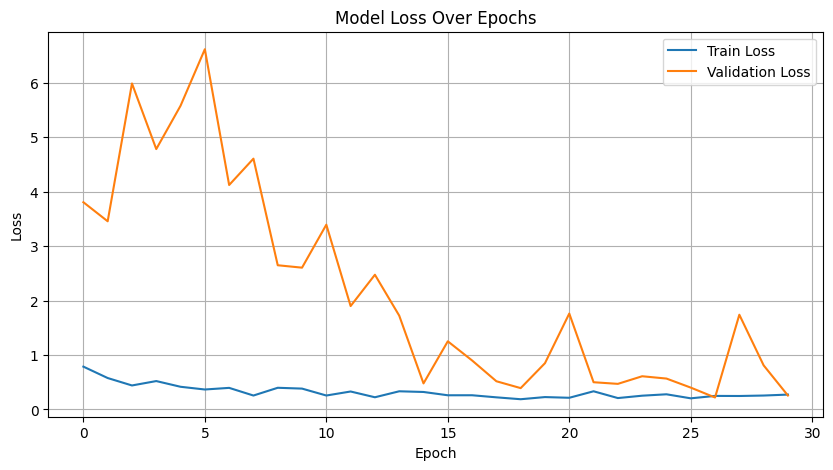

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import zipfile

# === Unzip the dataset ===
dataset_zip_path = "/content/Weather-Analysis-main.zip"  # Path to the zip file
dataset_path = "/content/Weather-Analysis-main"  # Folder after extraction

if not os.path.exists(dataset_path):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")

# === Image Preprocessing and Augmentation ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Load training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Print class indices
print("Class Indices:", train_data.class_indices)

# === Build an Improved CNN Model ===
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Assuming 4 weather classes
])

# === Compile the Model ===
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Train the Model ===
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data
)

# === Plot Accuracy ===
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# === Plot Loss ===
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# === Evaluate the model on the validation set ===
val_loss, val_accuracy = model.evaluate(val_data)
print(f"\nFinal Validation Accuracy (evaluated): {val_accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.8926 - loss: 0.3100

Final Validation Accuracy (evaluated): 0.9148


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step
 Confusion Matrix:
[[50  0  7  3]
 [ 1 39  0  2]
 [ 2  1 44  3]
 [ 0  0  0 71]]

📄 Classification Report:
              precision    recall  f1-score   support

       cloud       0.94      0.83      0.88        60
        rain       0.97      0.93      0.95        42
       shine       0.86      0.88      0.87        50
     sunrise       0.90      1.00      0.95        71

    accuracy                           0.91       223
   macro avg       0.92      0.91      0.91       223
weighted avg       0.92      0.91      0.91       223



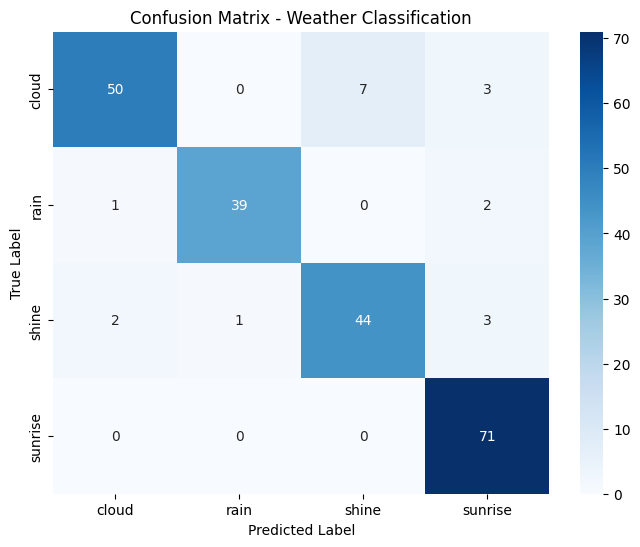

In [ ]:
# === Get Predictions on the Validation Set ===
val_preds = model.predict(val_data)  # Predict probabilities
val_pred_classes = np.argmax(val_preds, axis=1)  # Convert to class indices

# === True Labels ===
true_classes = val_data.classes

# === Class Labels (Category Names) ===
class_labels = list(val_data.class_indices.keys())

# === Confusion Matrix ===
cm = confusion_matrix(true_classes, val_pred_classes)
print(" Confusion Matrix:")
print(cm)

# === Classification Report ===
report = classification_report(true_classes, val_pred_classes, target_names=class_labels)
print("\n📄 Classification Report:")
print(report)
# Step 4: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Weather Classification')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Example: extract predicted probabilities for two classes
shine_probs = val_preds[:, class_labels.index('shine')]
cloud_probs = val_preds[:, class_labels.index('cloud')]

# Z-Test
z_stat, z_p = stats.ttest_ind(shine_probs, cloud_probs, equal_var=True)
print(f"\n🔬 Z-Test: z-statistic = {z_stat:.4f}, p-value = {z_p:.4f}")

# T-Test
t_stat, t_p = stats.ttest_ind(shine_probs, cloud_probs, equal_var=False)
print(f"📏 T-Test: t-statistic = {t_stat:.4f}, p-value = {t_p:.4f}")



🔬 Z-Test: z-statistic = -1.1670, p-value = 0.2438
📏 T-Test: t-statistic = -1.1670, p-value = 0.2438


In [ ]:
cm = confusion_matrix(true_classes, val_pred_classes)

FP = cm.sum(axis=0) - np.diag(cm)  # False Positives
FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives
TP = np.diag(cm)                   # True Positives
TN = cm.sum() - (FP + FN + TP)     # True Negatives

type1_error_rate = FP / (FP + TN)
type2_error_rate = FN / (FN + TP)

print(f"\n🚫 Type I Error Rate (False Positives): {np.mean(type1_error_rate):.4f}")
print(f"❌ Type II Error Rate (False Negatives): {np.mean(type2_error_rate):.4f}")



🚫 Type I Error Rate (False Positives): 0.0263
❌ Type II Error Rate (False Negatives): 0.0821


In [ ]:
# One-way ANOVA on predicted probabilities for all classes
anova_result = stats.f_oneway(*[val_preds[:, i] for i in range(len(class_labels))])
print(f"\n📊 ANOVA F-statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")



📊 ANOVA F-statistic = 8.3574, p-value = 0.0000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


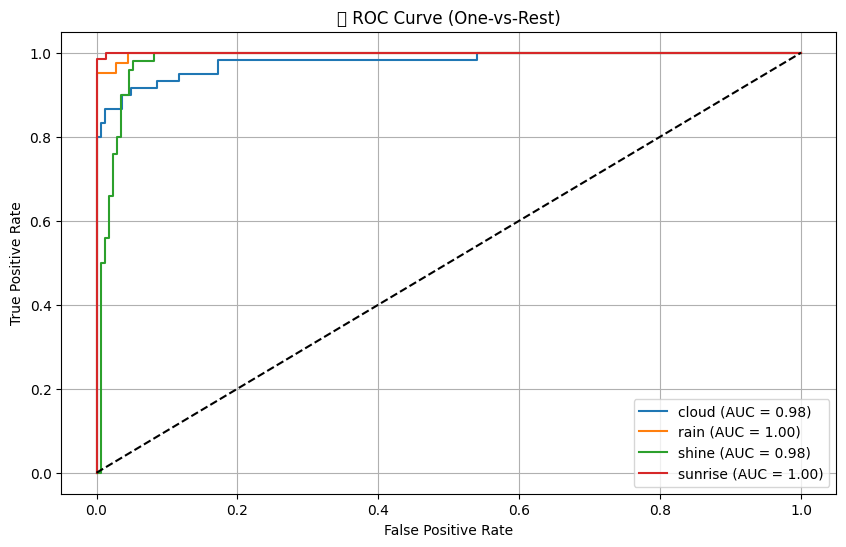

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize true classes
true_classes_bin = label_binarize(true_classes, classes=range(len(class_labels)))

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(true_classes_bin[:, i], val_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('🏁 ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


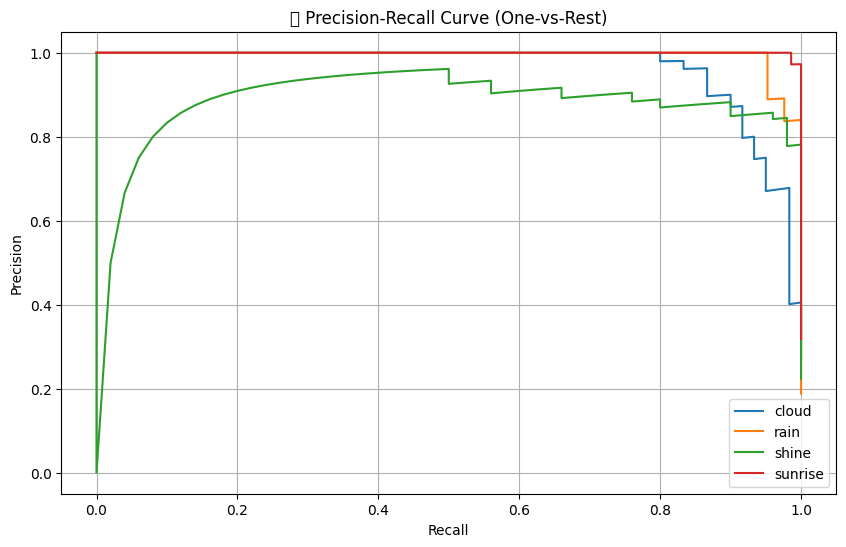

In [ ]:
# Precision-Recall Curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(class_labels)):
    precision, recall, _ = precision_recall_curve(true_classes_bin[:, i], val_preds[:, i])
    plt.plot(recall, precision, label=f'{class_labels[i]}')

plt.title('🎯 Precision-Recall Curve (One-vs-Rest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()
